# 9과 이변량_범주 vs 범주

<img src='https://github.com/DA4BAM/image/blob/main/%EC%9D%B4%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=700/>

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd  # 랜덤 샘플링을 위한 함수들

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


## 2.교차표(pd.crosstab)

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [3]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


In [4]:
pd.crosstab(titanic['Survived'], titanic['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


In [5]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.660991
1,0.553571,0.38961,0.339009


In [6]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.271930,0.087719,0.640351


In [7]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

Embarked,C,Q,S
Survived,,,
0,0.084175,0.05275,0.479237
1,0.104377,0.03367,0.245791


## 3.시각화 : 
* 100% Stacked Bar
* mosaic

1) Pclass --> Survived

* 100% Stacked Bar
    * 먼저 crosstab으로 집계(꼭 오른쪽문법을 이용해 주세요!!!) : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


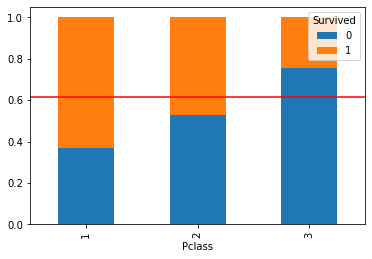

In [8]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

In [9]:
titanic['Survived'].mean() # 전체 생존율

0.3838383838383838

비율만 비교하므로 양에 대한 비교는 할 수 없다!

* mosaic plot
    * mosaic(dataframe, [ feature, target])

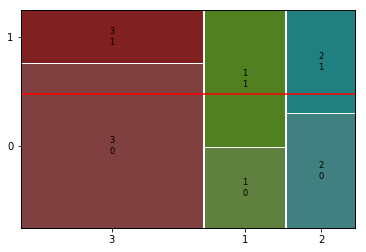

In [10]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

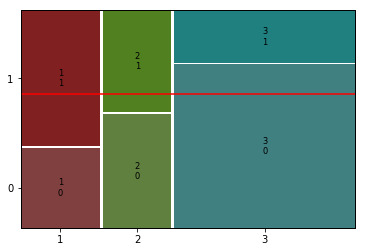

In [11]:
# 저장된 값 순서대로 보여집니다. 
# 정렬하고 싶으면 .sort_values를 이용하면 됩니다.
# 사이 간격도 gap 옵션으로 조정 가능합니다.

mosaic(titanic.sort_values(['Pclass', 'Survived']), [ 'Pclass','Survived'], gap = 0.01)
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


### 실습 :
아래 관계에 대해서 교차표와 시각화(100% Stacked bar, mosaic)를 수행하고, feature와 target 간에 관계가 있는지 분석해 봅시다.


* Sex --> Survived

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


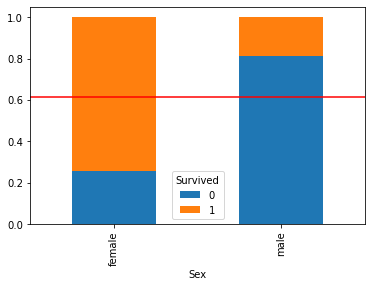

In [13]:
# 100% Stacked bar chart

# 1) 먼저 집계를 한다.
temp = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize = 'index')
print(temp)

# 2) 차트를 그린다.
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

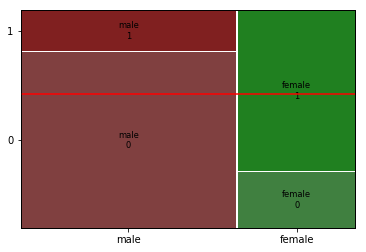

In [14]:
# mosaic
mosaic(titanic, ['Sex', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

* Embarked --> Survived

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009


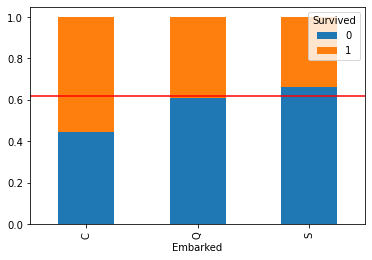

In [15]:
# 100% Stacked bar chart

# 1) 먼저 집계를 한다.
temp = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize = 'index')
print(temp)

# 2) 차트를 그린다.
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

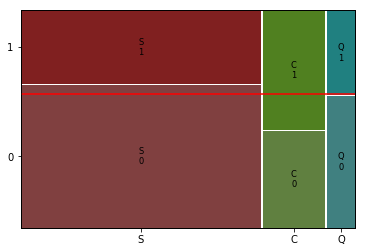

In [16]:
# mosaic
mosaic(titanic, ['Embarked', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

* Title --> Survived

Survived         0         1
Title                       
Master    0.439024  0.560976
Miss      0.297297  0.702703
Mr        0.839388  0.160612
Mrs       0.203125  0.796875
Others    0.785714  0.214286


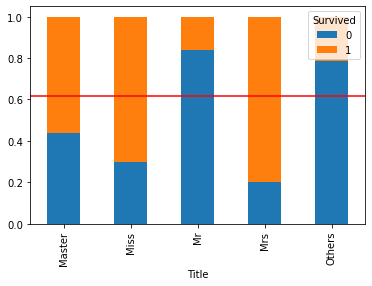

In [17]:
# 100% Stacked bar chart

# 1) 먼저 집계를 한다.
temp = pd.crosstab(titanic['Title'], titanic['Survived'], normalize = 'index')
print(temp)

# 2) 차트를 그린다.
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

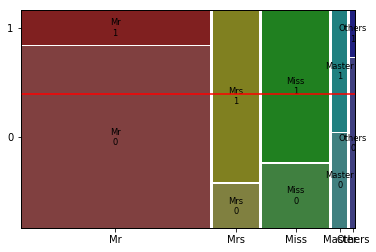

In [18]:
# mosaic
mosaic(titanic, ['Title', 'Survived'], gap = 0.01)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

3) 시각화 결과를 분석하는 방법  
* 한가지만 기억하세요!  귀무가설이 참일 때 나올 그래프의 모양(아래 그림)
* 여기서 벗어나면, 차이가 있다. 관련이 있다는 말입니다.



<img src='https://github.com/DA4BAM/image/blob/main/%EB%AA%A8%EC%9E%90%EC%9D%B5.png?raw=true' width=700/>

* [참조] 모자익 플롯을 3 범주로 그리려면...

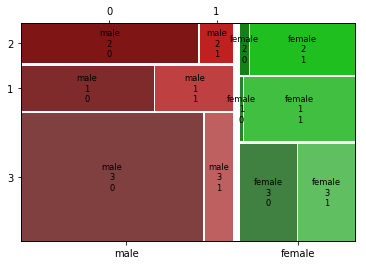

In [19]:
# 세 범주로 그리려면...
mosaic(titanic, ['Sex','Pclass','Survived'], gap = 0.02)
plt.show()

## 4.수치화 : 카이제곱검정

* 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지, 수치화 하는 방법

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

* 카이 제곱 통계량은
    * 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    * 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    * 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 본다. 

* 범주형 변수의 자유도 : 범주의 수 - 1

* 카이제곱검정에서는
    * x 변수의 자유도 × y 변수의 자유도
    * 예 : Pclass --> Survived
        * Pclass : 범주가 3개, Survived : 2개
        * (3-1) * (2-1) = 2
        * 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면, 차이가 있다고 볼수 있음.


* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [20]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [21]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
자유도 2
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


### 실습
다음의 관계에 대해 수치화 해 봅시다.

* Sex --> Survived

In [22]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Sex'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Sex       female  male
Survived              
0             81   468
1            233   109
----------------------------------------------------------------------------------------------------
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
자유도 1
기대빈도
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


* Embarked --> Survived

In [23]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Embarked'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219
----------------------------------------------------------------------------------------------------
카이제곱통계량 25.964452881874784
p-value 2.3008626481449577e-06
자유도 2
기대빈도
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


* Title --> Survived

In [24]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Title'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Title     Master  Miss   Mr  Mrs  Others
Survived                                
0             18    55  439   26      11
1             23   130   84  102       3
----------------------------------------------------------------------------------------------------
카이제곱통계량 289.1953165452417
p-value 2.318405007221846e-61
자유도 4
기대빈도
 [[ 25.26262626 113.98989899 322.25252525  78.86868687   8.62626263]
 [ 15.73737374  71.01010101 200.74747475  49.13131313   5.37373737]]


# 종합실습

## 1.환경준비

* 라이브러리 불러오기

In [25]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 직원 이직 분석


In [26]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV'
data = pd.read_csv(path)  
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


## 2.교차표(pd.crosstab)
교차표를 연습해 봅시다.

① 성별(Gender)에 따른 이직여부(Attrition)의 관계를 교차표로 만들어 봅시다.
* 전체 갯수

In [27]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
table = pd.crosstab(data['Gender'], data['Attrition'])
print('교차표\n', table)


교차표
 Attrition    0    1
Gender             
Female     403   66
Male       598  129


* 칼럼기준 비율

In [28]:
pd.crosstab(data['Gender'], data['Attrition'], normalize = 'columns')

Attrition,0,1
Gender,,
Female,0.402597,0.338462
Male,0.597403,0.661538


* 행 기준 비율

In [29]:
pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')

Attrition,0,1
Gender,,
Female,0.859275,0.140725
Male,0.822558,0.177442


* 전체 기준 비율

In [30]:
pd.crosstab(data['Gender'], data['Attrition'], normalize = 'all')

Attrition,0,1
Gender,,
Female,0.336957,0.055184
Male,0.500000,0.107860


* 교차표를 통해 성별에 따라 이직여부가 관련 있다고 보이나요?
* 위 교차표 중 어떤 것이 성별-->이직여부 관련성을 확인하기에 적합한가요?

In [31]:
#콜롬에 따라 관찰
#이직 한 사람중 남자가 여자보다 2배 많음 
#연관 있다 생각

② 직무만족도에 따른 이직여부의 관계를 교차표로 만들어 봅시다.
* 전체 갯수

In [32]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data['JobSatisfaction'], data['Attrition'])

Attrition,0,1
JobSatisfaction,,
1,191,52
2,189,37
3,295,59
4,326,47


* 칼럼기준 비율

In [33]:
pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'columns')

Attrition,0,1
JobSatisfaction,,
1,0.190809,0.266667
2,0.188811,0.189744
3,0.294705,0.302564
4,0.325674,0.241026


* 행 기준 비율

In [34]:
pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')

Attrition,0,1
JobSatisfaction,,
1,0.786008,0.213992
2,0.836283,0.163717
3,0.833333,0.166667
4,0.873995,0.126005


* 전체 기준 비율

In [35]:
pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'all')

Attrition,0,1
JobSatisfaction,,
1,0.159699,0.043478
2,0.158027,0.030936
3,0.246656,0.049331
4,0.272575,0.039298


* 교차표를 통해 직무만족도에 따라 이직여부가 관련 있다고 보이나요?
* 위 교차표 중 어떤 것이 직무만족도-->이직여부 관련성을 확인하기에 적합한가요?

In [36]:
#이직 한 사람의 비율관찰시 직무 만족도는 별 관계 없어보ㅇ;ㅁ

③ 결혼상태에 따른 이직여부의 관계를 교차표로 만들어 봅시다.
* 전체 갯수

In [37]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data['MaritalStatus'], data['Attrition'])

Attrition,0,1
MaritalStatus,,
Divorced,241,23
Married,479,69
Single,281,103


* 칼럼기준 비율

In [39]:
pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'columns')

Attrition,0,1
MaritalStatus,,
Divorced,0.240759,0.117949
Married,0.478521,0.353846
Single,0.280719,0.528205


* 행 기준 비율

In [40]:
pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'index')

Attrition,0,1
MaritalStatus,,
Divorced,0.912879,0.087121
Married,0.874088,0.125912
Single,0.731771,0.268229


* 전체 기준 비율

In [41]:
pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'all')

Attrition,0,1
MaritalStatus,,
Divorced,0.201505,0.019231
Married,0.400502,0.057692
Single,0.234950,0.086120


* 교차표를 통해 결혼상태에 따라 이직여부가 관련 있다고 보이나요?
* 위 교차표 중 어떤 것이 결혼상태-->이직여부 관련성을 확인하기에 적합한가요?

In [ ]:
#결혼 한 사람일 수 록 이직율 낮음


④ 성별, 직무만족도, 결혼상태 중 어떤 변수가 이직여부를 예측하는데 더 중요한 변수인가요?

In [ ]:
#성별, 결혼
#둘이 해봐라

## 3.시각화 : bar chart, mosaic

① Gender --> Attrition
* 100% bar chart을 그려봅시다. 

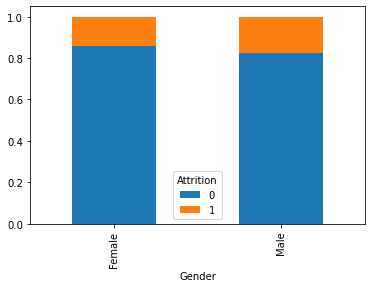

In [45]:

temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)

plt.show()

* 모자익 플롯을 그려봅시다.

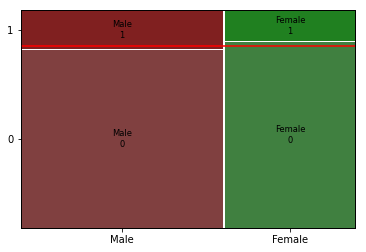

In [46]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(data, [ 'Gender','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

* 두 차트로 볼 때, 성별에 따라 이직여부가 달라지나요?

In [ ]:
#별 차이 안나보임

② JobSatisfaction --> Attrition
* 100% bar chart을 그려봅시다. 

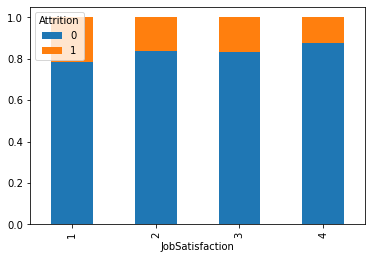

In [47]:
temp = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)

plt.show()

* 모자익 플롯을 그려봅시다.

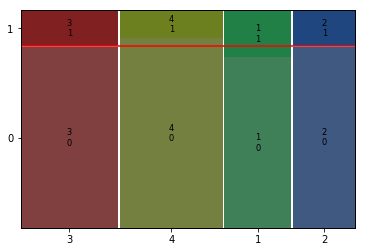

In [49]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(data, [ 'JobSatisfaction','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

* 두 차트로 볼 때, 직무만족도에 따라 이직여부가 달라지나요?

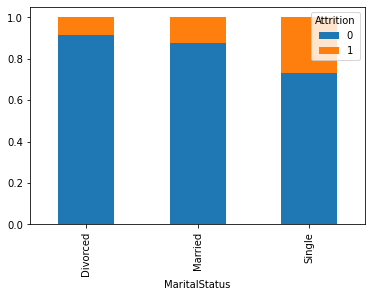

In [51]:
temp = pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)

plt.show()

③ MaritalStatus --> Attrition
* 100% bar chart을 그려봅시다. 

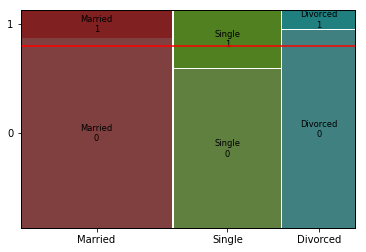

In [50]:
mosaic(data, [ 'MaritalStatus','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

* 모자익 플롯을 그려봅시다.

* 두 차트로 볼 때, 직무만족도에 따라 이직여부가 달라지나요?

In [ ]:
#미혼

## 4.수치화 : 카이제곱검정

① Gender --> Attrition

In [52]:
# 먼저 집계
table = pd.crosstab(data['Gender'], data['Attrition'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Attrition    0    1
Gender             
Female     403   66
Male       598  129
----------------------------------------------------------------------------------------------------
카이제곱통계량 2.5537631338119975
p-value 0.1100318964829815
자유도 1
기대빈도
 [[392.5326087  76.4673913]
 [608.4673913 118.5326087]]


② JobSatisfaction --> Attrition

In [54]:
# 먼저 집계
table = pd.crosstab(data['JobSatisfaction'], data['Attrition'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Attrition          0   1
JobSatisfaction         
1                191  52
2                189  37
3                295  59
4                326  47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.40684948576828
p-value 0.0383107376547955
자유도 3
기대빈도
 [[203.38043478  39.61956522]
 [189.15217391  36.84782609]
 [296.2826087   57.7173913 ]
 [312.18478261  60.81521739]]


③ MaritalStatus --> Attrition

In [53]:
table = pd.crosstab(data['MaritalStatus'], data['Attrition'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Attrition        0    1
MaritalStatus          
Divorced       241   23
Married        479   69
Single         281  103
----------------------------------------------------------------------------------------------------
카이제곱통계량 47.82247929575401
p-value 4.12553775054082e-11
자유도 2
기대빈도
 [[220.95652174  43.04347826]
 [458.65217391  89.34782609]
 [321.39130435  62.60869565]]
